<a href="https://colab.research.google.com/github/DAVIDCUEAGUI/LABORATORIO/blob/main/Serie_de_tiempo_Hist%C3%B3rico_D%C3%B3lar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter
import pandas_datareader as dr
from scipy import stats
from datetime import date, datetime, timedelta
%matplotlib inline
plt.style.use("ggplot")

In [ ]:
# Cargue de base de datos
serie_t = pd.read_excel('/content/Copia de 1.1.1.TCM_Serie historica IQY.xlsx')

In [ ]:
# Información de variables
serie_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12006 entries, 0 to 12005
Data columns (total 2 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Fecha (dd/mm/aaaa)                               12006 non-null  datetime64[ns]
 1   Tasa de cambio representativa del mercado (TRM)  12006 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 187.7 KB


In [ ]:
# Cambiar nombre de las columnas
serie_t.columns = ['Date', 'Dolar']

In [ ]:
serie_t

,Date,Dolar
0,1991-11-27,693.32
1,1991-11-28,693.99
2,1991-11-29,694.70
3,1991-11-30,694.70
4,1991-12-01,643.42
...,...,...
12001,2024-10-05,4173.66
12002,2024-10-06,4173.66
12003,2024-10-07,4173.66
12004,2024-10-08,4194.97


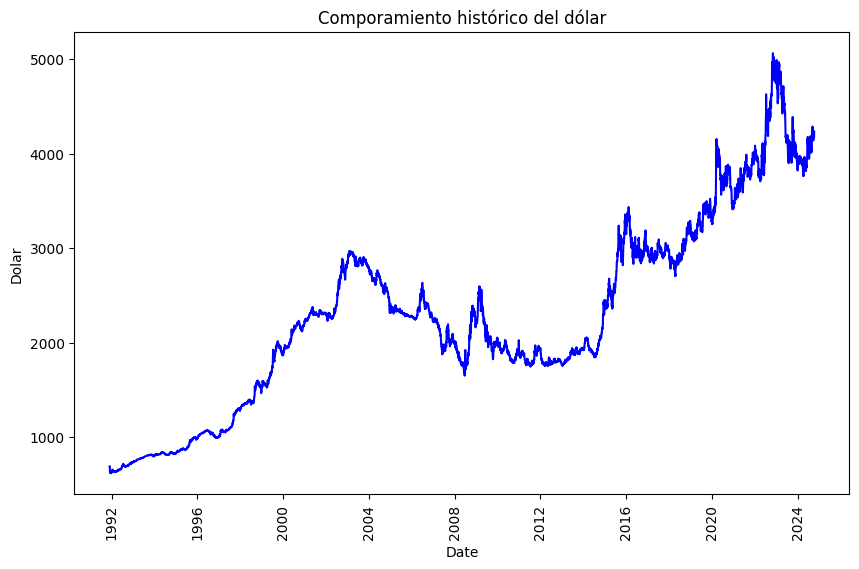

In [ ]:
# Crear gráfico de líneas para ver el comportamiento histórico del dólar

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(serie_t['Date'], serie_t['Dolar'], color = 'blue')

plt.xticks(rotation=90)

plt.title('Comporamiento histórico del dólar')
plt.xlabel('Date')
plt.ylabel('Dolar')

plt.show()

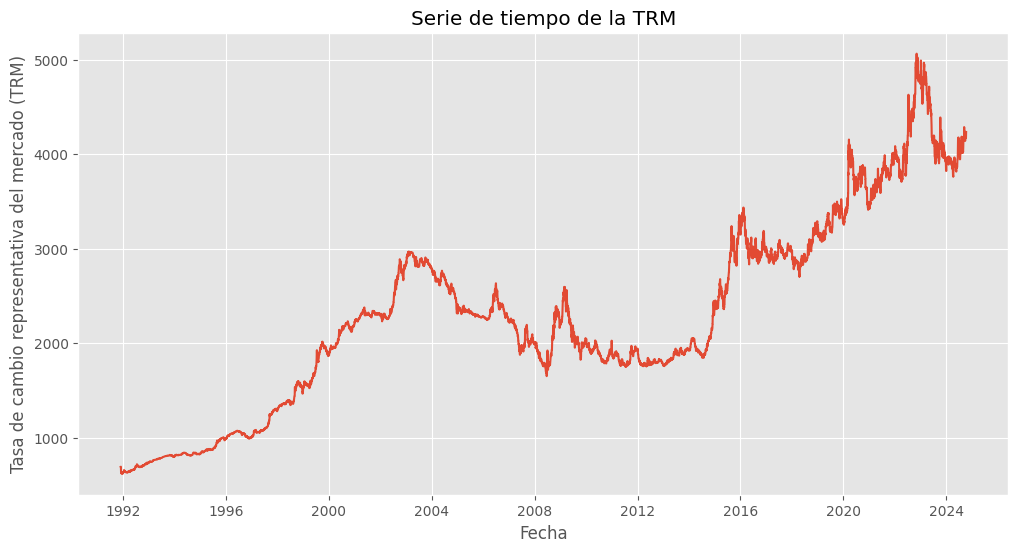

In [ ]:
# Grafica la serie de tiempo de df
plt.figure(figsize=(12, 6))
plt.plot(serie_t['Date'], serie_t['Dolar'])
plt.xlabel('Fecha')
plt.ylabel('Tasa de cambio representativa del mercado (TRM)')
plt.title('Serie de tiempo de la TRM')
plt.grid(True)
plt.show()

In [ ]:
Fecha = serie_t['Date']
Dolar_Pesos = serie_t['Dolar']

In [ ]:
# Media móvil 30 días
n = 365
k = len(Dolar_Pesos)
mmovil = np.empty(k)
mmovil[:] = np.nan
ini = 0

for i in range(n-1, k):
  mmovil[i] = np.sum(Dolar_Pesos[ini:i+1])/n
  ini += 1
  mmovil

In [ ]:
mmovil

array([     nan,      nan,      nan, ..., 4181.728, 4184.804, 4191.737])

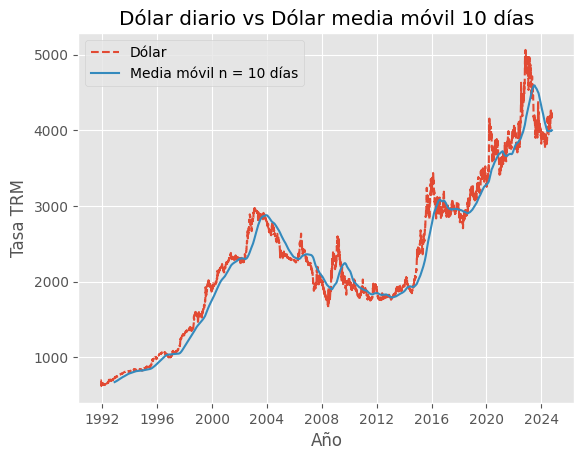

In [ ]:
plt.plot(Fecha, Dolar_Pesos, '--', label='Dólar')
plt.plot(Fecha , mmovil, label= 'Media móvil n = 365 días')
plt.title('Dólar diario vs Dólar media móvil 365
 días')
plt.xlabel('Año')
plt.ylabel('Tasa TRM')
plt.legend()
plt.show()

In [ ]:
# Ejercicio de estacionalidad
estacional = Dolar_Pesos - mmovil
estacional

,Dolar
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
12001,172.116164
12002,172.699726
12003,173.283288
12004,195.118466


Text(0, 0.5, 'Dólar')

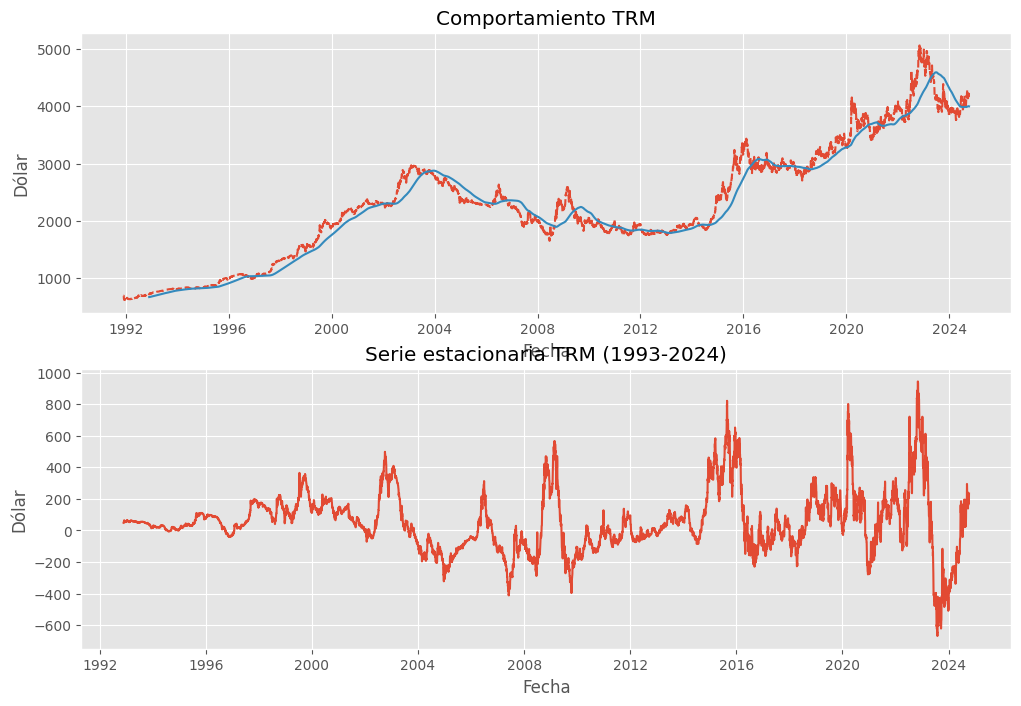

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(Fecha, Dolar_Pesos, '--', label = 'Serie diaria')
plt.plot(Fecha, mmovil, label = 'Serie anual')
plt.title('Comportamiento TRM')
plt.ylabel('Dólar')
plt.xlabel('Fecha')
plt.subplot(212)
plt.plot(Fecha, estacional, '-', label = 'Serie estacionaria')
plt.title('Serie estacionaria TRM (1993-2024)')
plt.xlabel('Fecha')
plt.ylabel('Dólar')

In [ ]:
import statsmodels.api as sm
descomposicion = sm.tsa.seasonal_decompose(serie_t['Dolar'], model = 'multiplicative', period = 360)


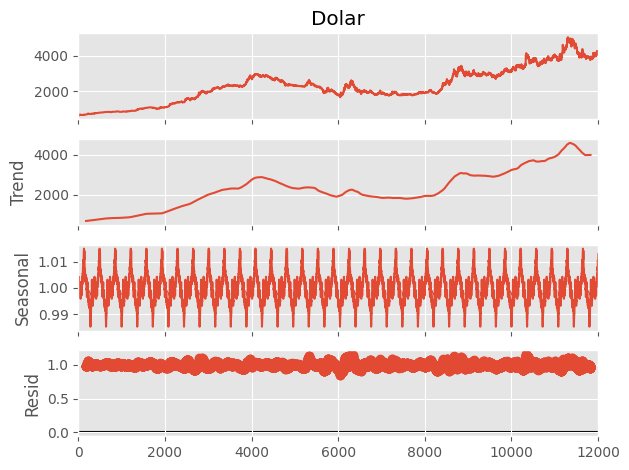

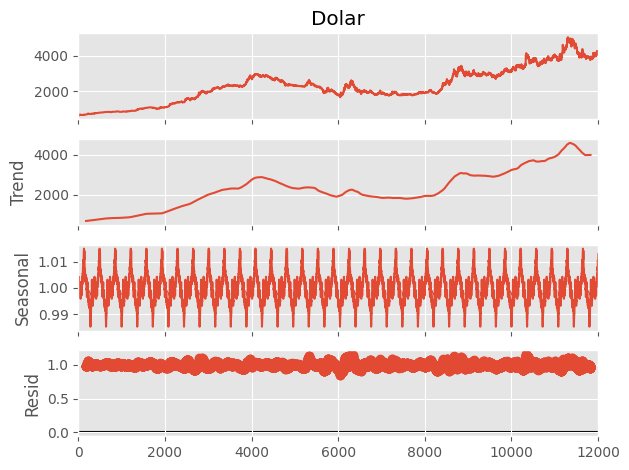

In [ ]:
descomposicion.plot()

In [ ]:
# Índices de variación estacional (IVE) y desestacionalización

# Transformar los datos a valores trimestrales
def get_trimestre(t):
  dt = t - int(t)
  if dt <= 0.25:
    trimestre = 1
  elif dt > 0.25 and dt <= 0.5:
    trimestre = 2
  elif dt > 0.5 and dt <= 0.75:
    trimestre = 3
  else:
    trimestre = 4
  return trimestre

serie_t['Year'] = serie_t['Date'].apply(lambda t; int(t))
serie_t['T']

In [ ]:
!pip install pydataset
from pydataset import data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 76.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939416 sha256=9804ae991ab43708a47d178e9578b0877030507bf448e0d683e5324ee7458740
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


In [ ]:
co2 = data('co2')
co2

,time,co2
1,1959.000000,315.42
2,1959.083333,316.31
3,1959.166667,316.50
4,1959.250000,317.56
5,1959.333333,318.13
...,...,...
464,1997.583333,362.57
465,1997.666667,360.24
466,1997.750000,360.83
467,1997.833333,362.49
